Original data link: [data](https://www.kaggle.com/datasets/heitornunes/caffeine-content-of-drinks/data)

This notebook is analyzing a dataset about the caffeine and calorie contents of different drinks. It is also going to be making predictions on the data set using 4 different machine learning techniques.

Analysis of the notebook: 

- What features/columns had a relatively even or normal distribution? Which features/columns did not?
    - The only feature that had a normal distribution is the type feature which is what we were predicting. The rest of the features were not evenly distributed, this was made very clear from the bar graphs that were made. 
- How did you handle missing values? Why did you do this method as opposed to others?
    - I didn't have any missing values in this data set.
- How did you encode your categorical data? Why did you do this method as opposed to others?
    - I label encoded my type category to make it easier to recognize them. Since they were label encoded it allowed the algorithms to process them as numbers and make predictions of classes.
- How did you handle removing outliers? Why did you use this method as opposed to others?
    - I didn't remove any outliers. I did have some outliers of drinks with 0 caffeine and 0 calories but those are very clear distinctions of a drink being water so removing those would have just ruined the classification accuracy on any drinks that were water. 
- How did you normalize/standardize the data? Why did you use this method as opposed to others?
    - I didn't have to standardize the data as they were all some kind of number. The only difference was that the Volume column was a float while Caffeine and Calories were integers.
- How did each model perform? Which performed the best?
    - Each model performed with decent accuracy. The most accurate was the decision tree. I am not sure if this was actually the case or if it was overfit to the data, but it was performing at about 98-99% each time I ran it. 
- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?
    - None of the models showed underfitting or overfitting. When ran on the testing set and the training set the accuracy scores were fairly similar. The test numbers were consistently a little bit worse which is to be expected since it is seeing these data points for the first time. 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
rawCaffeineDF = pd.read_csv("caffeine.csv")

rawCaffeineDF.head()

,drink,Volume,Calories,Caffeine,type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [5]:
rawCaffeineDF.describe()

,Volume,Calories,Caffeine
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [6]:
rawCaffeineDF.isna().sum()

drink       0
Volume      0
Calories    0
Caffeine    0
type        0
dtype: int64

In [7]:
categoricalCol = ["type"]
numericalCols = ["Volume", "Calories", "Caffeine"]

In [8]:
def makeBarCount(myDF, colName, width, height):
    """This function generates a bar chart with the value count for all values of a given
       and dataframe

    Args:
        myDF (DataFrame): Dataframe of Data
        colName (String): Name of Column in DataFrame
        width (float): width of figure
        height (float): height of figure
    """
    plt.figure()
    myDF[colName].value_counts().plot(kind='bar', figsize=(width, height))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Count of Entries In {colName} Column", y=1.02)

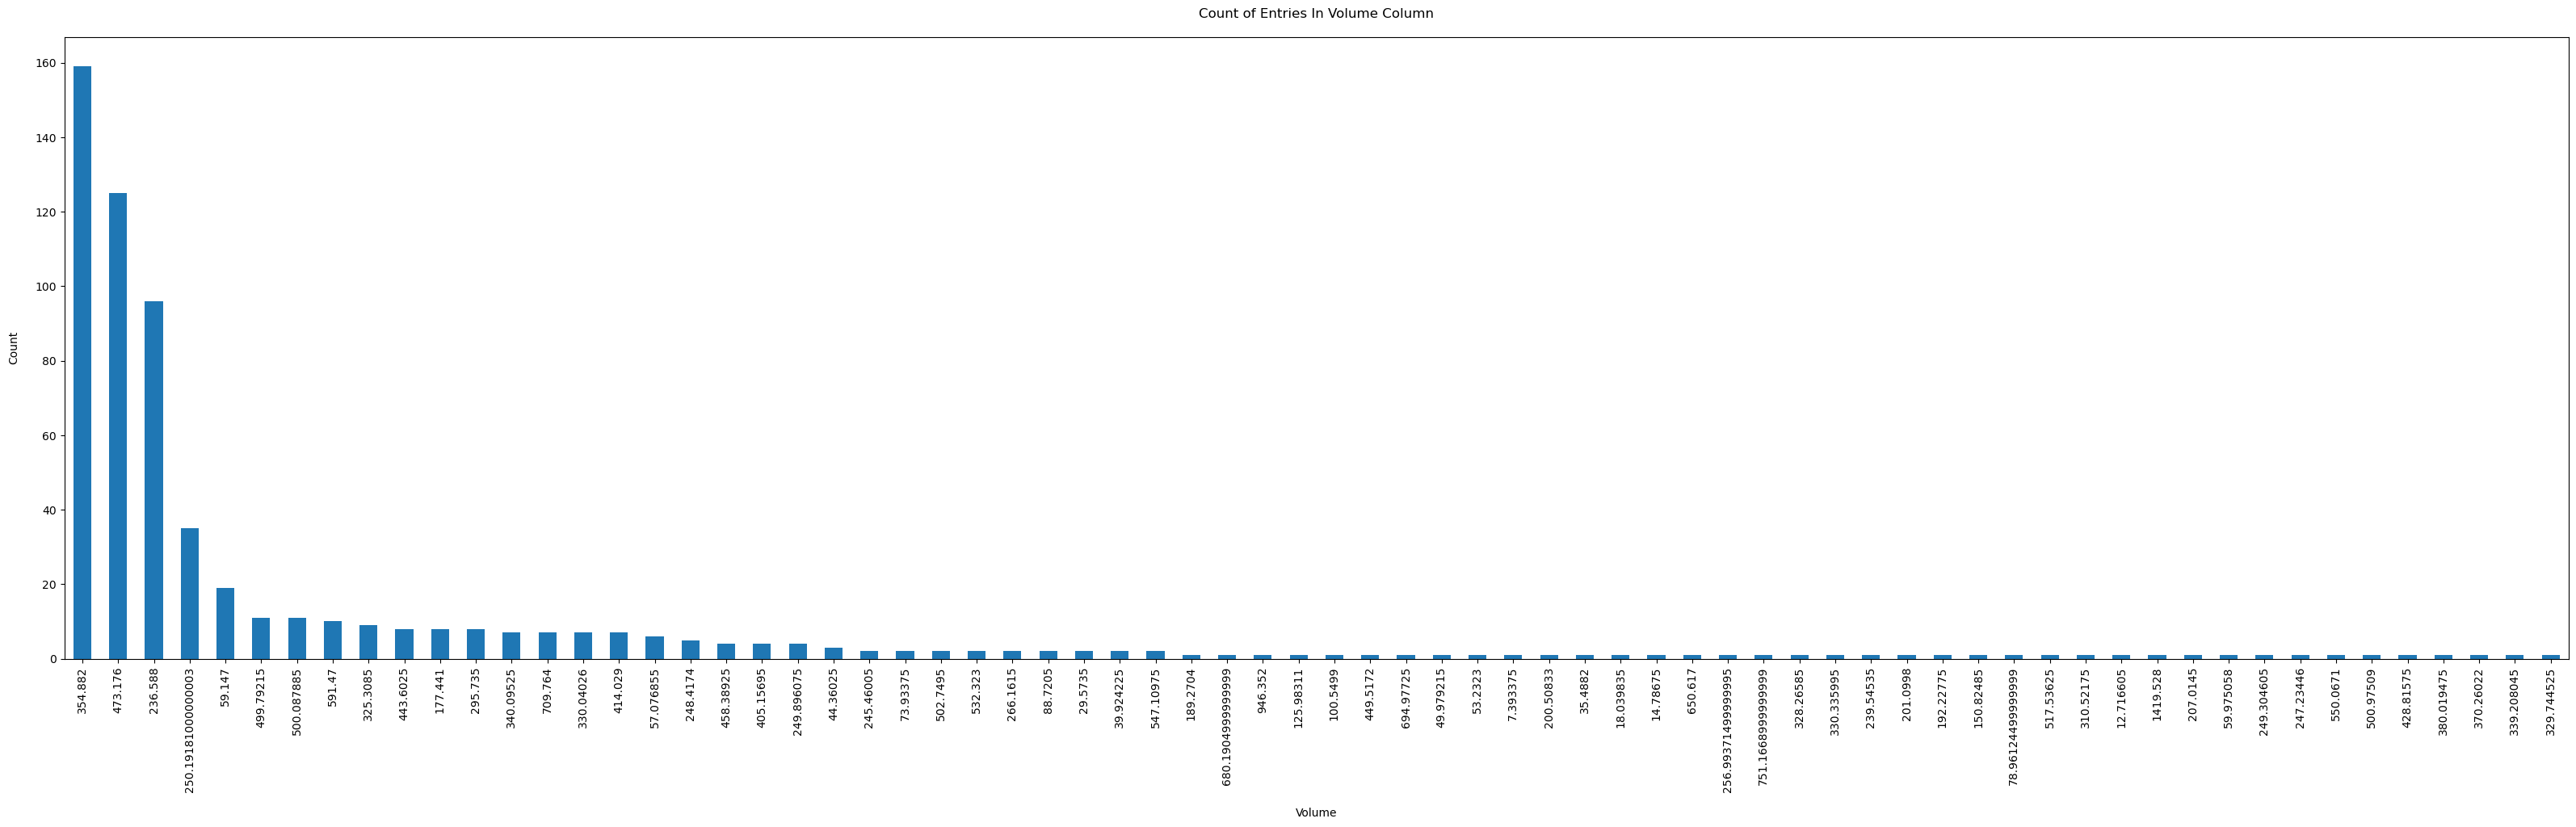

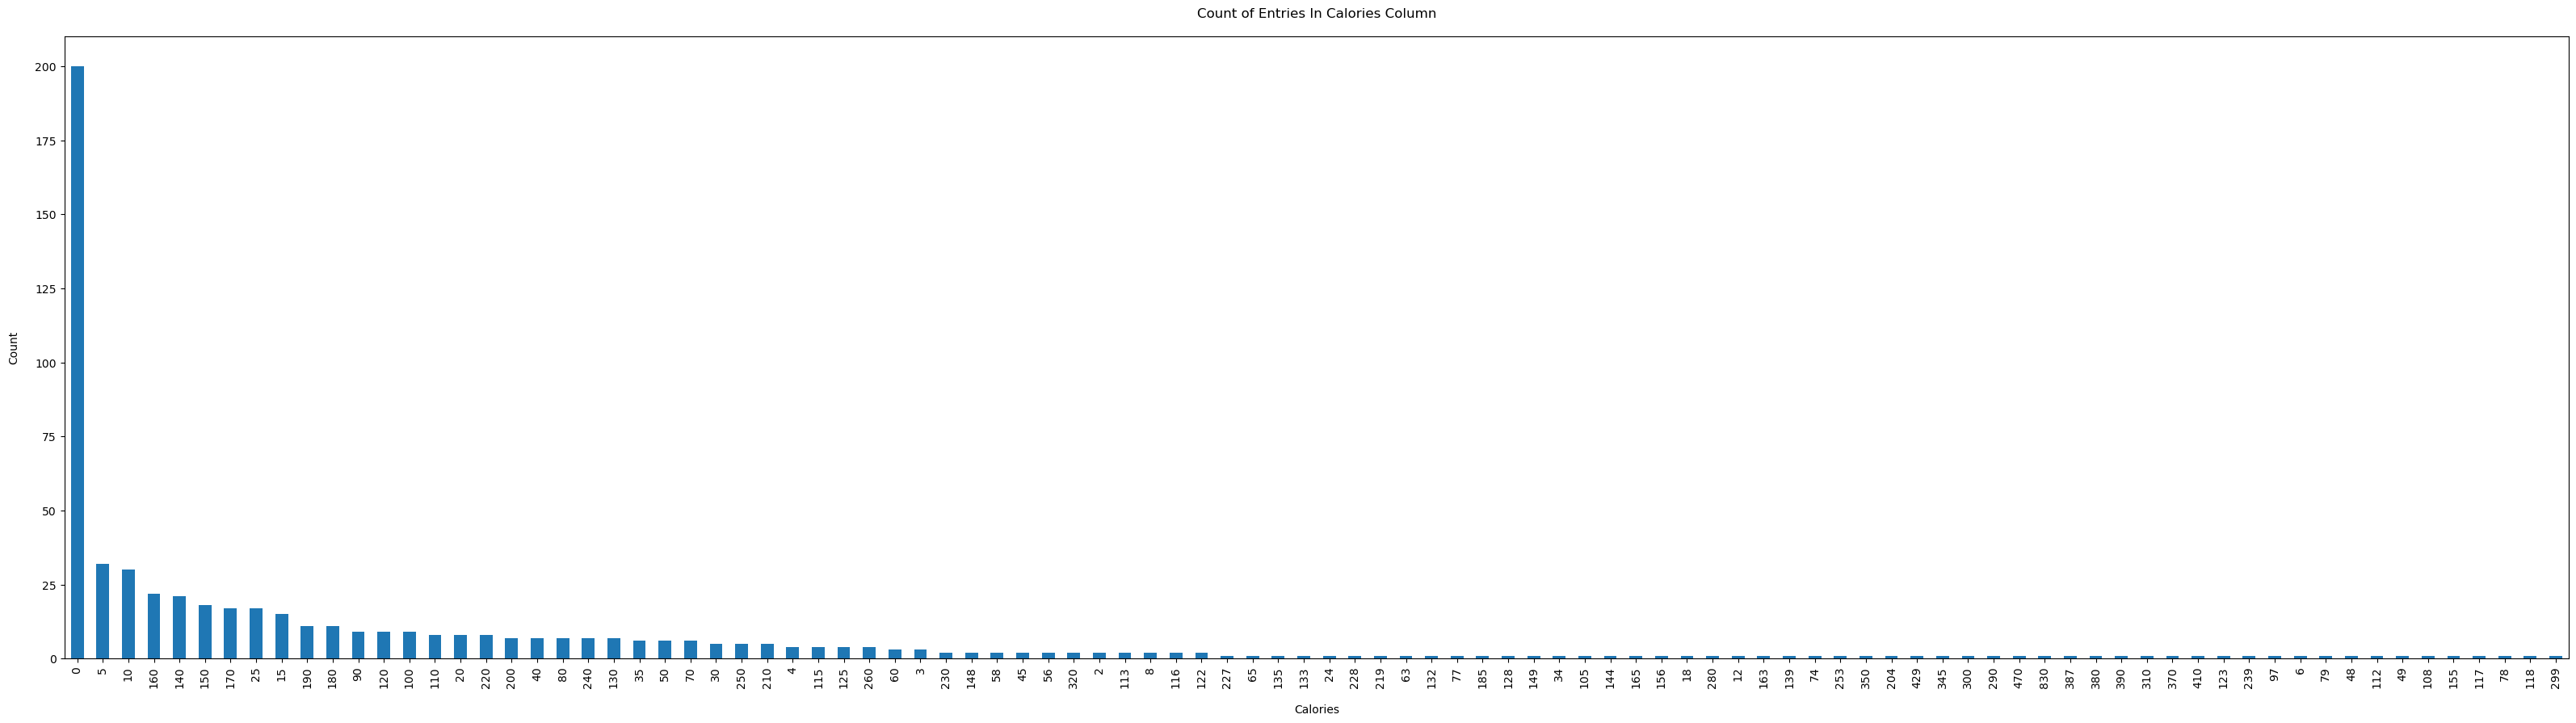

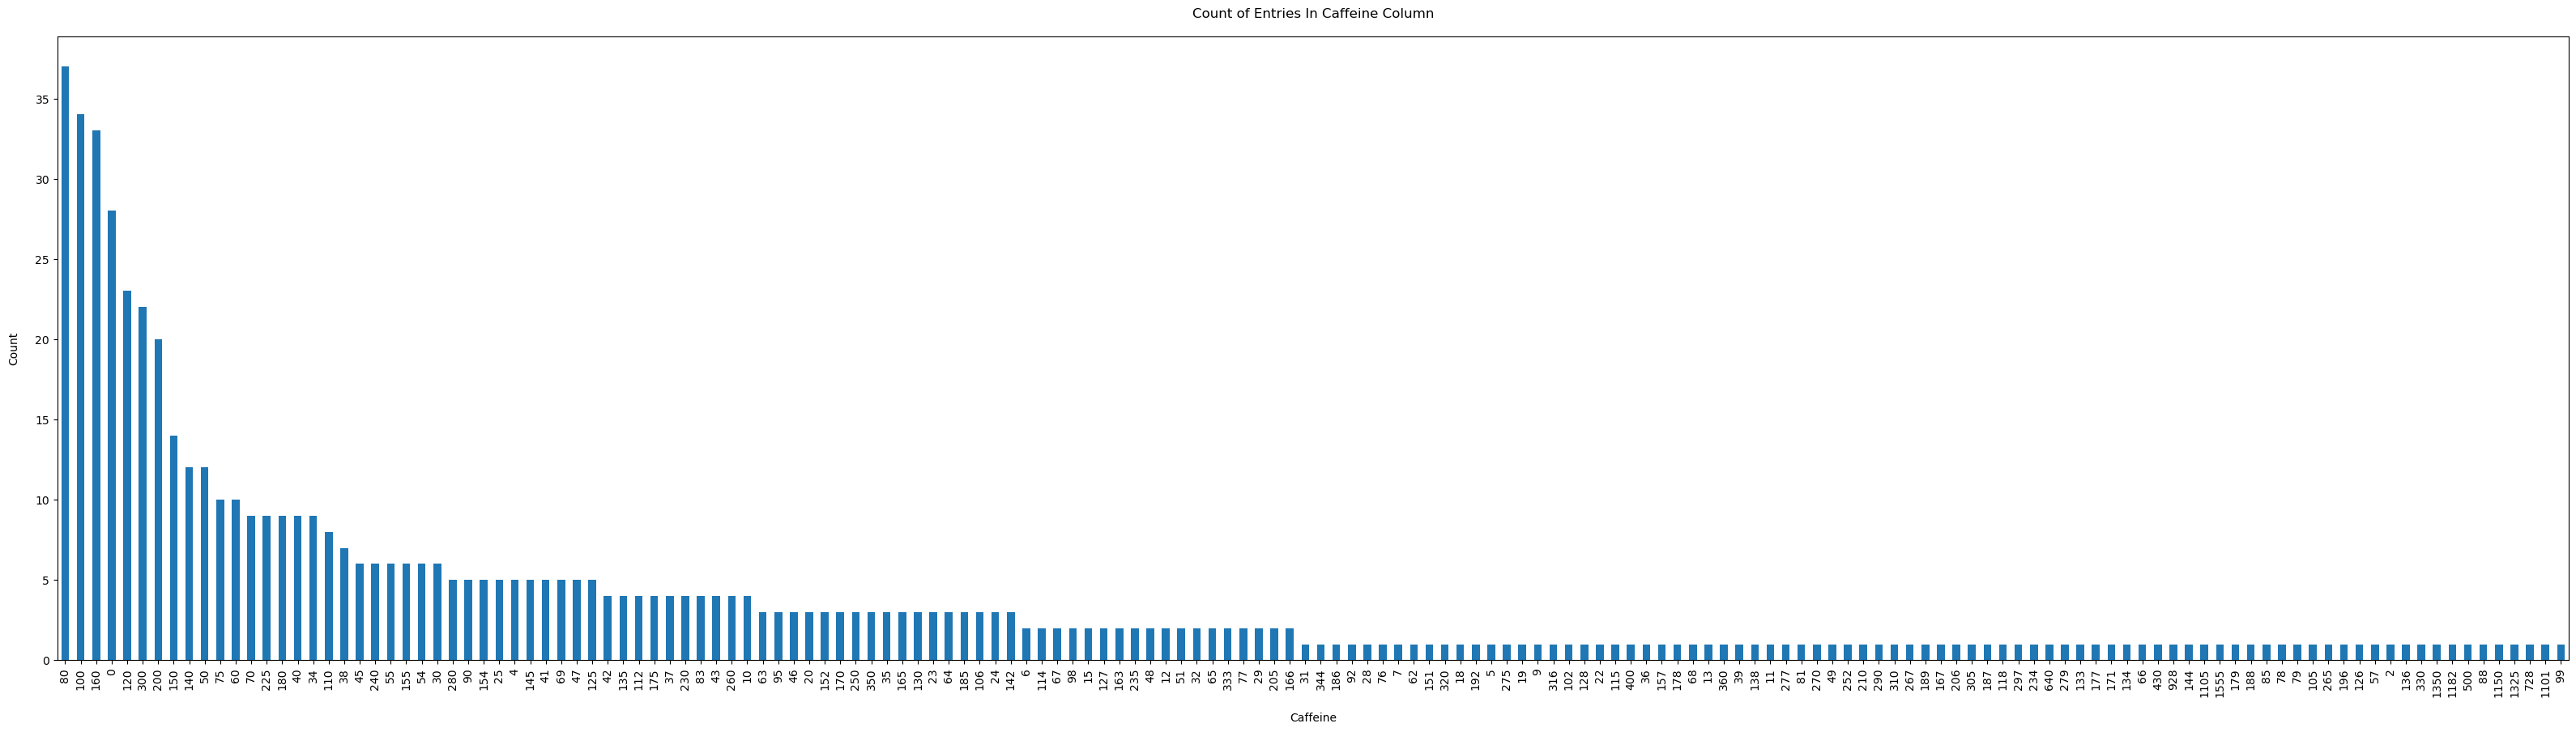

In [9]:
for col in numericalCols:
    makeBarCount(rawCaffeineDF, col, 40, 10)

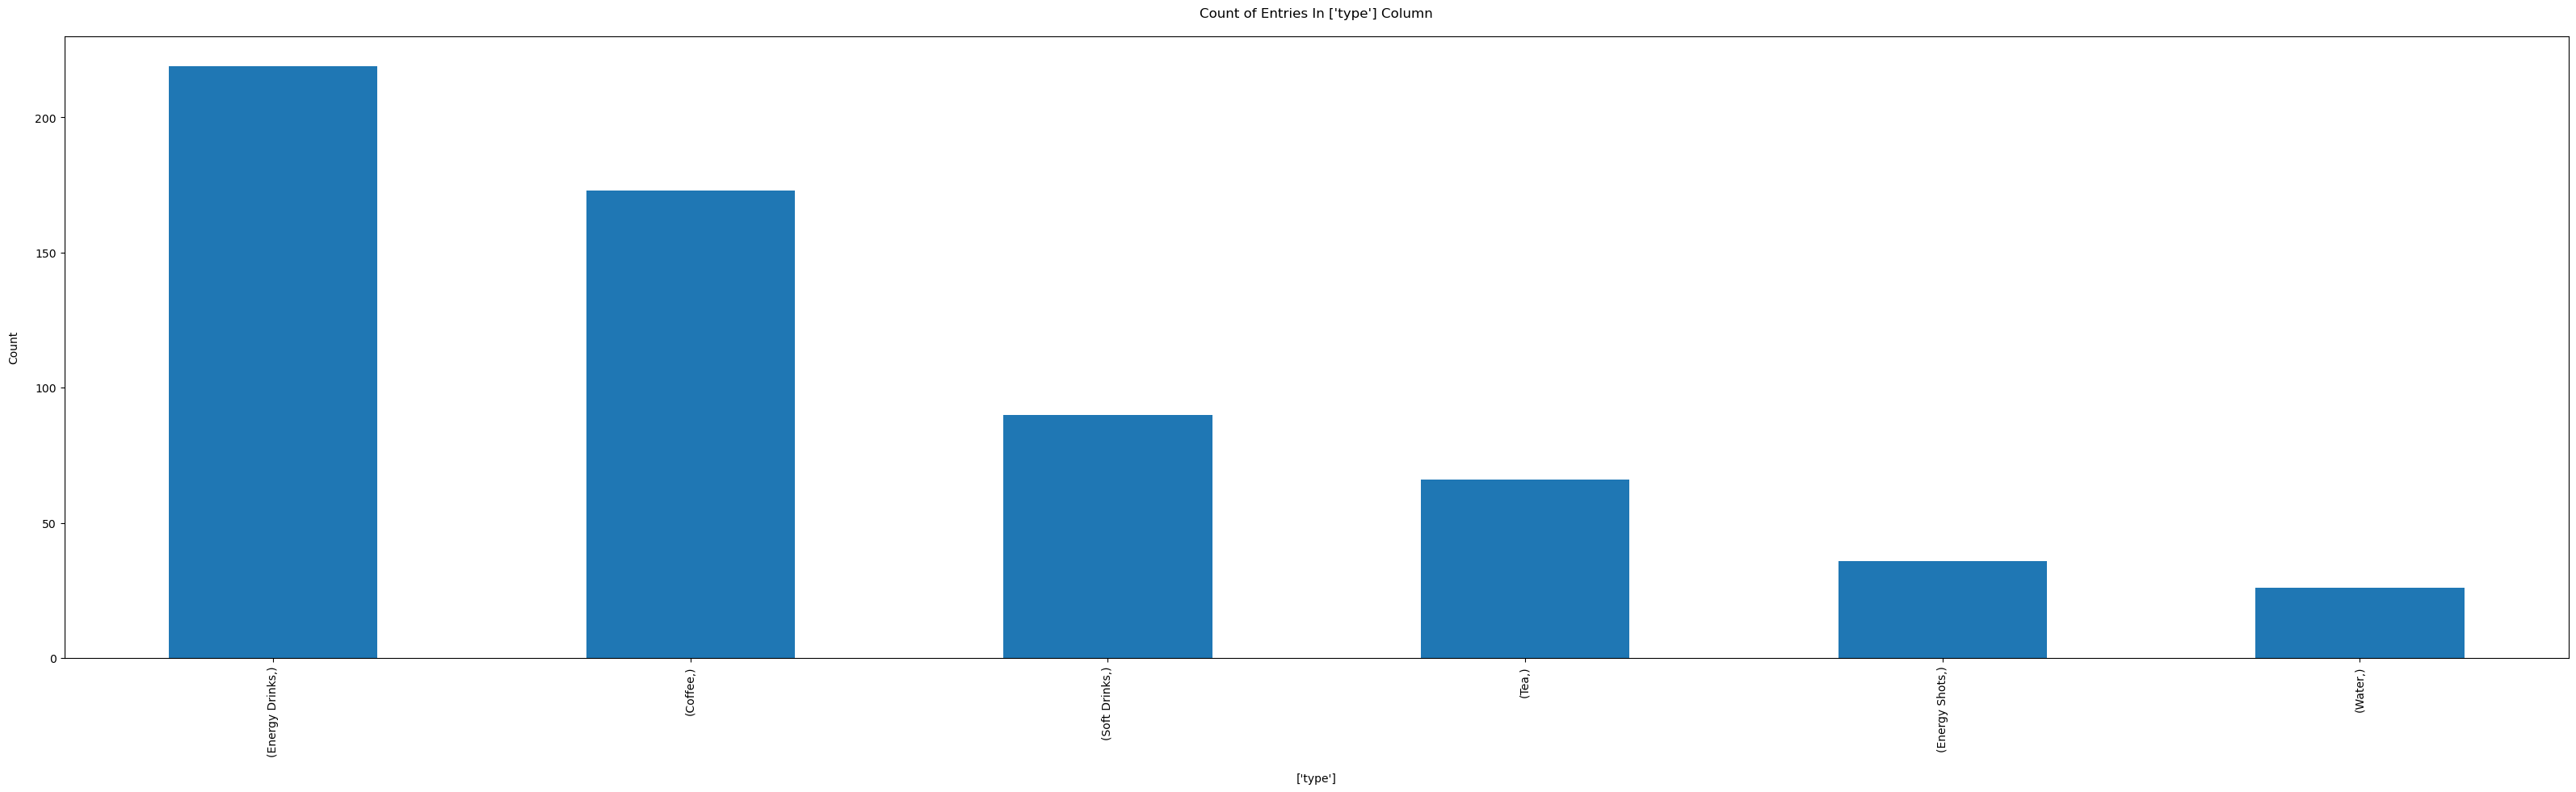

In [10]:
makeBarCount(rawCaffeineDF, categoricalCol, 40, 10)

In [11]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList

In [12]:
typeList = ["Coffee", "Energy Drinks", "Energy Shots", "Soft Drinks", "Tea", "Water"]

rawCaffeineDF["type"] = rawCaffeineDF["type"].replace(typeList, getLabelList(len(typeList)))

rawCaffeineDF.tail()

,drink,Volume,Calories,Caffeine,type
605,Pep Talk Sparkling Water,354.882,0,55,5
606,Polar Seltzer Water,354.882,0,0,5
607,Yerbae Sparkling Water,354.882,0,100,5
608,Tonic Water,295.735,110,0,5
609,MiO Energy Water Enhancer,236.588,0,60,5


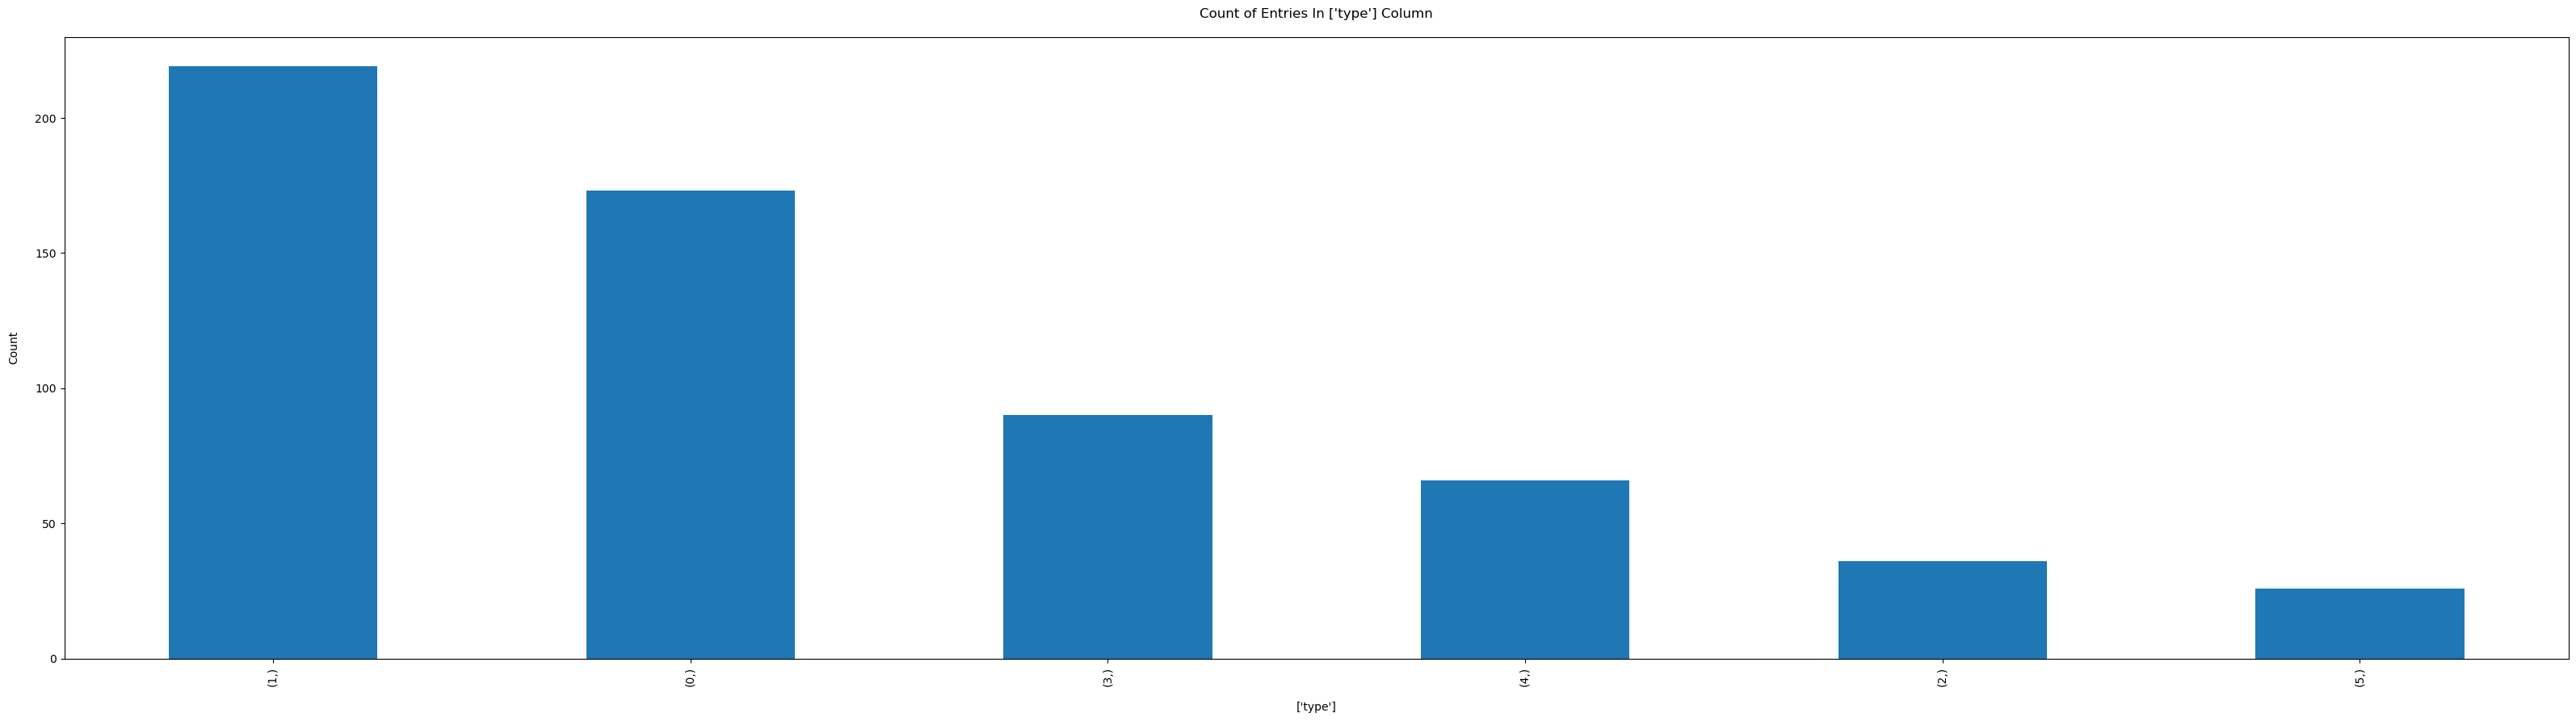

In [13]:
makeBarCount(rawCaffeineDF, categoricalCol, 40, 10)

In [15]:
rawCaffeineDF["Volume"].dtype

dtype('float64')

In [16]:
rawCaffeineDF["Caffeine"].dtype

dtype('int64')

In [17]:
rawCaffeineDF["Calories"].dtype

dtype('int64')

In [28]:
# seperating the target column from the features
featureDF = rawCaffeineDF.reset_index().drop(columns="drink")

yDF = pd.DataFrame(featureDF["type"])

yDF.head()

,type
0,0
1,0
2,0
3,0
4,0


In [29]:
xDF = featureDF.drop(columns="type")

xDF.head()

,index,Volume,Calories,Caffeine
0,0,256.993715,0,277
1,1,250.191810,0,145
2,2,250.191810,150,100
3,3,250.191810,0,430
4,4,250.191810,0,66


In [30]:
print(xDF.shape)
print(yDF.shape)

(610, 4)
(610, 1)


In [64]:
# split training and testing set

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF,
                                                test_size = 0.3,
                                                shuffle=True)

xTrain.head()

,index,Volume,Calories,Caffeine
65,65,473.17600,15,225
527,527,458.38925,120,150
46,46,473.17600,380,167
580,580,236.58800,0,80
225,225,499.79215,15,170


In [57]:
# Importing evaluation metrics 
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainPrecision = precision_score(yTrain, trainPreds, average='weighted')
trainRecall = recall_score(yTrain, trainPreds, average='weighted')
trainF1 = f1_score(yTrain, trainPreds, average='weighted')

testPrecision = precision_score(yTest, testPreds, average='weighted')
testRecall = recall_score(yTest, testPreds, average='weighted')
testF1 = f1_score(yTest, testPreds, average='weighted')

print(f"Train Precision: {trainPrecision}")
print(f"Train Recall: {trainRecall}")
print(f"Train F1 Score: {trainF1}")

print('\n')

print(f"Test Precision: {testPrecision}")
print(f"Test Recall: {testRecall}")
print(f"Test F1 Score: {testF1}")


Train Precision: 0.794913091454997
Train Recall: 0.7798594847775175
Train F1 Score: 0.779917395355176


Test Precision: 0.7263408098048156
Test Recall: 0.73224043715847
Test F1 Score: 0.717040460191736


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model does not seem to have too much variance or bias it just isn't that accurate.

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainPrecision = precision_score(yTrain, trainPreds, average='weighted')
trainRecall = recall_score(yTrain, trainPreds, average='weighted')
trainF1 = f1_score(yTrain, trainPreds, average='weighted')

testPrecision = precision_score(yTest, testPreds, average='weighted')
testRecall = recall_score(yTest, testPreds, average='weighted')
testF1 = f1_score(yTest, testPreds, average='weighted')

print(f"Train Precision: {trainPrecision}")
print(f"Train Recall: {trainRecall}")
print(f"Train F1 Score: {trainF1}")

print('\n')

print(f"Test Precision: {testPrecision}")
print(f"Test Recall: {testRecall}")
print(f"Test F1 Score: {testF1}")

Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


Test Precision: 0.9893478506033484
Test Recall: 0.9890710382513661
Test F1 Score: 0.9889237273401312


The Decision Tree doesn't have too much bias or variance it is scarily accurate though.

In [66]:
from sklearn.svm import SVC

model = SVC().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainPrecision = precision_score(yTrain, trainPreds, average='weighted')
trainRecall = recall_score(yTrain, trainPreds, average='weighted')
trainF1 = f1_score(yTrain, trainPreds, average='weighted')

testPrecision = precision_score(yTest, testPreds, average='weighted')
testRecall = recall_score(yTest, testPreds, average='weighted')
testF1 = f1_score(yTest, testPreds, average='weighted')

print(f"Train Precision: {trainPrecision}")
print(f"Train Recall: {trainRecall}")
print(f"Train F1 Score: {trainF1}")

print('\n')

print(f"Test Precision: {testPrecision}")
print(f"Test Recall: {testRecall}")
print(f"Test F1 Score: {testF1}")

Train Precision: 0.9839897807110922
Train Recall: 0.9812646370023419
Train F1 Score: 0.9795013087202094


Test Precision: 0.9654477559548089
Test Recall: 0.9617486338797814
Test F1 Score: 0.9584920233587236


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Support Vector Classifier doesn't have too much bias or variance it is just really accurate like the decision tree

In [67]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainPrecision = precision_score(yTrain, trainPreds, average='weighted')
trainRecall = recall_score(yTrain, trainPreds, average='weighted')
trainF1 = f1_score(yTrain, trainPreds, average='weighted')

testPrecision = precision_score(yTest, testPreds, average='weighted')
testRecall = recall_score(yTest, testPreds, average='weighted')
testF1 = f1_score(yTest, testPreds, average='weighted')

print(f"Train Precision: {trainPrecision}")
print(f"Train Recall: {trainRecall}")
print(f"Train F1 Score: {trainF1}")

print('\n')

print(f"Test Precision: {testPrecision}")
print(f"Test Recall: {testRecall}")
print(f"Test F1 Score: {testF1}")

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8991715344110176
Train Recall: 0.8969555035128806
Train F1 Score: 0.8964881387316704


Test Precision: 0.8307560258314093
Test Recall: 0.8306010928961749
Test F1 Score: 0.8301299927196938


The Neural Network doesn't have too much bias or variance it is appropriately accurate too